In [1]:
import numpy as np
import pandas as pd

import random
import os
from astropy.io import fits
from astropy.table import Table

import matplotlib.pyplot as plt

from astropy.visualization import make_lupton_rgb
plt.style.use('dark_background')

In [2]:
def make_plot_all(objects, data):
    
    for i in range(len(objects)):
        if(i%4 == 0):
            plt.figure(figsize=(10,6))
            for j in range(4):
                if(i+j > len(objects)-1): break
                plt.subplot(1,4,j+1)
                title = 'Prob: {:.3f}'.format(data['PROB'].values[i+j])
                #title = 'Prob: {:.3f}, rank: {}'.format(data['PROB'].values[i+j], int(data['RANK'].values[i+j]))
                print(data['COADD_OBJECT_ID'].values[i+j])
                #print(data['Prob'].values[i+j], int(data['rank'].values[i+j]))
                plt.title(title)
                rgb = make_lupton_rgb(objects[i+j][2], objects[i+j][1], objects[i+j][0], Q=11., stretch=40.)
                plt.imshow(rgb, aspect='equal')
                plt.xticks([], [])
                plt.yticks([], []) 
            plt.show()

In [3]:
hdu_list = fits.open('Unique_positives_complete.fits')
print(len(hdu_list[1].data))
images = hdu_list[1].data
images = images[:,0:3,:,:]
data = pd.DataFrame(hdu_list[2].data)
hdu_list.close()

path_cutouts = '/Users/jimenagonzalez/research/DSPL/Searching-double-lenses/real_lenses/Jack_Y6/'
hdu_list = fits.open(path_cutouts + 'Cutouts/Jack_Y6.fits')
lenses = hdu_list[1].data.astype(np.float32)
data_pos = hdu_list[2].data
data_pos = Table(data_pos)
data_pos = data_pos.to_pandas()
columns_data = data_pos.columns
hdu_list.close()

data_not = pd.read_csv(path_cutouts + 'not_in_cutouts.csv')
data_not = data_not.astype({'COADD_OBJECT_ID': int})

new_data = pd.merge(data_pos, data_not, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
lenses = lenses[new_data.index]
data_pos = data_pos.iloc[new_data.index].reset_index()

print('All sample: ', len(lenses))

20642
All sample:  140


In [4]:
#Jack
N = 0
numpix = 45
images_sim = np.zeros((1,3,numpix,numpix))
for i in range(len(lenses)):
    data_tmp = data[data['RA'] < data_pos['RA'].iloc[i] + 0.05][data['RA'] > data_pos['RA'].iloc[i] - 0.05]
    data_tmp = data_tmp[data['DEC'] < data_pos['DEC'].iloc[i] + 0.05][data_tmp['DEC'] > data_pos['DEC'].iloc[i] - 0.05]
    if(len(data_tmp) >= 1):
        images_sim = np.append(images_sim, [lenses[i]], axis = 0)
        N += 1
print(N)

images_sim = np.delete(images_sim, 0, axis = 0)
#make_plot_all(images_sim, data)

/Users/jimenagonzalez/Software/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/jimenagonzalez/Software/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


94


1
1036111060


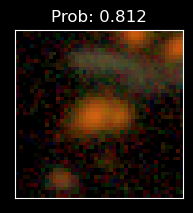

1
1036111060


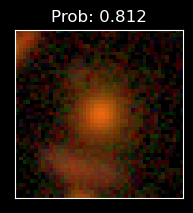

In [5]:
ind = data[data['COADD_OBJECT_ID'] == 1603413383].index
print(len(ind))
make_plot_all(images[ind], data)

ind = data_pos[data_pos['COADD_OBJECT_ID'] == 1603413407].index
print(len(ind))
make_plot_all(lenses[ind], data)

1196484135
1603413407


/Users/jimenagonzalez/Software/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # This is added back by InteractiveShellApp.init_path()
/Users/jimenagonzalez/Software/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == "":


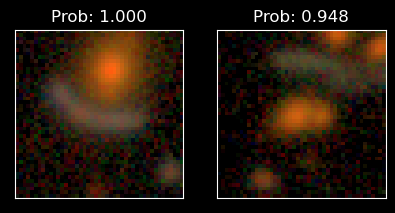

In [6]:
#DSPL analysis
path_dspl = '/Users/jimenagonzalez/research/DSPL/Searching-double-lenses/vit_cnn_multiclass/'
dspl_ids = pd.read_csv(path_dspl + 'double.csv')
dspl_images = np.zeros((1,3,45,45))
dspl_data = pd.DataFrame(columns=data_pos.columns)

for i in range(len(dspl_ids)):
    candidate = data_pos[data_pos['COADD_OBJECT_ID'] == dspl_ids['COADD_OBJECT_ID'].iloc[i]]
    if(len(candidate) == 0): continue
    candidate = candidate.iloc[0]
    data_tmp = data[data['RA'] < candidate['RA'] + 0.05][data['RA'] > candidate['RA'] - 0.05]
    data_tmp = data_tmp[data['DEC'] < candidate['DEC'] + 0.05][data_tmp['DEC'] > candidate['DEC'] - 0.05]
    if(len(data_tmp) > 0):
        images_tmp = images[data_tmp.index]
        dspl_images = np.append(dspl_images, images_tmp, axis = 0)
        other_coadd = data_tmp['COADD_OBJECT_ID']
        data_tmp['COADD_OBJECT_ID'] = [dspl_ids['COADD_OBJECT_ID'].iloc[i]]
        data_tmp['COADD_OBJECT_ID_2'] = other_coadd
        dspl_data = dspl_data.append(data_tmp)
        

dspl_images = np.delete(dspl_images, 0, axis = 0)
make_plot_all(dspl_images, dspl_data)

In [7]:
path_cutouts = '/Users/jimenagonzalez/research/DSPL/Searching-double-lenses/real_lenses/Jacobs_Y6/'
hdu_list = fits.open(path_cutouts + 'Cutouts/Jacobs_Y6.fits')
lenses = hdu_list[1].data.astype(np.float32)
data_pos = hdu_list[2].data
data_pos = Table(data_pos)
data_pos = data_pos.to_pandas()
hdu_list.close()
print('All sample: ', len(lenses))

data_not = pd.read_csv(path_cutouts + 'not_in_cutouts.csv')
data_not = data_not.astype({'COADD_OBJECT_ID': int})

new_data = pd.merge(data_pos, data_not, indicator=True, how='outer').query('_merge=="left_only"').drop('_merge', axis=1)
lenses = lenses[new_data.index]
data_pos = data_pos.iloc[new_data.index].reset_index()

print('With lensing features inside of cutout: ', len(data_pos))

All sample:  496
With lensing features inside of cutout:  457


In [8]:
# Jacobs
N = 0
numpix = 45
images_sim = np.zeros((1,3,numpix,numpix))
for i in range(len(lenses)):
    data_tmp = data[data['RA'] < data_pos['RA'].iloc[i] + 0.05][data['RA'] > data_pos['RA'].iloc[i] - 0.05]
    data_tmp = data_tmp[data['DEC'] < data_pos['DEC'].iloc[i] + 0.05][data_tmp['DEC'] > data_pos['DEC'].iloc[i] - 0.05]
    if(len(data_tmp) >= 1):
        images_sim = np.append(images_sim, [lenses[i]], axis = 0)
        N += 1
print(N)

images_sim = np.delete(images_sim, 0, axis = 0)
#make_plot_all(images_sim, data)

/Users/jimenagonzalez/Software/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/Users/jimenagonzalez/Software/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys


374
